# Creacion de un plot de datos desde python y STM32

In [1]:
import serial
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [44]:
ser.close()

In [75]:
# Configuración de la conexión serial
ser = serial.Serial('COM6', 460800, timeout=1)  # Cambia '/dev/ttyUSB0' por tu puerto serial
# Si estás en Windows, el puerto podría ser algo como 'COM3'

# Envía un carácter para solicitar los datos
ser.write(b'R')  # Enviar un carácter cualquiera, aquí 'R'

# Lee 1024 valores del ADC
adc_values = []
fir_values = []
tra_values = []
for _ in range(8192):
    line = ser.readline().decode('utf-8').strip().split(',')
    if line[0].isdigit():
        tra_values.append(int(line[0]))
    if line[1].isdigit():
        fir_values.append(int(line[1]))
    if line[2].isdigit():
        adc_values.append(int(line[2]))

# Cierra la conexión serial
ser.close()

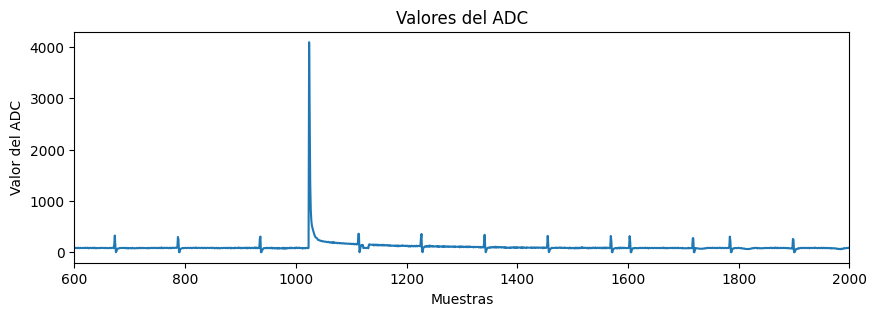

In [76]:

plt.figure(figsize=(10,3))
# Graficar los valores del ADC
plt.plot(adc_values)
plt.title('Valores del ADC')
plt.xlabel('Muestras')
plt.ylabel('Valor del ADC')
plt.xlim([600, 2000])
plt.show()

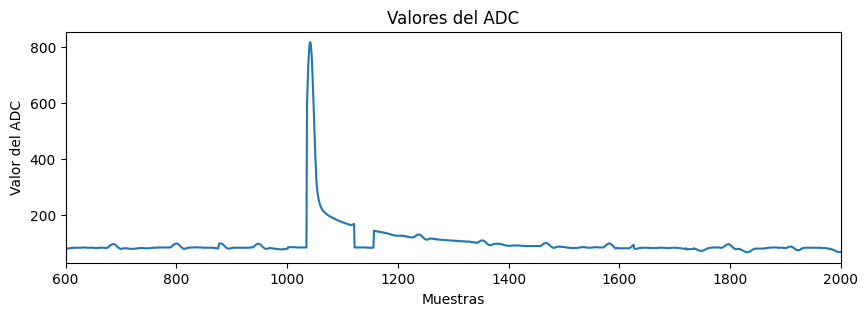

In [77]:

plt.figure(figsize=(10,3))
# Graficar los valores del ADC
plt.plot(fir_values)
plt.title('Valores del ADC')
plt.xlabel('Muestras')
plt.ylabel('Valor del ADC')
plt.xlim([600, 2000])
plt.show()

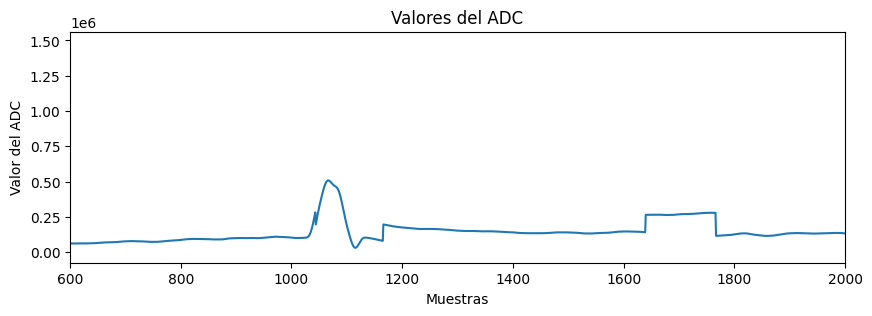

In [78]:
plt.figure(figsize=(10,3))
# Graficar los valores del ADC
plt.plot(tra_values)
plt.title('Valores del ADC')
plt.xlabel('Muestras')
plt.ylabel('Valor del ADC')
plt.xlim([600, 2000])
plt.show()

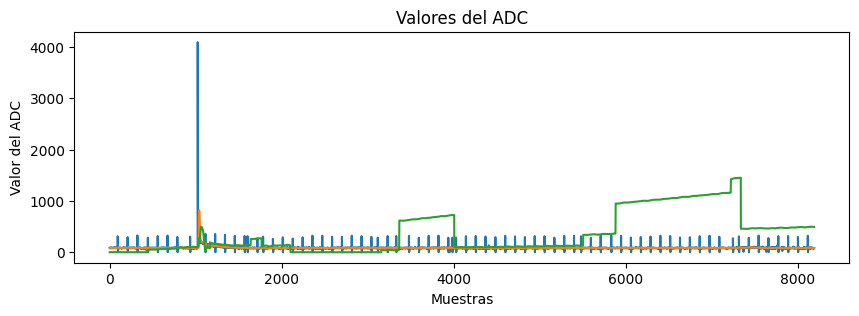

In [79]:

plt.figure(figsize=(10,3))
# Graficar los valores del ADC
plt.plot(np.array(adc_values))
plt.plot(np.array(fir_values))
plt.plot(np.array(tra_values)/(2**10))
plt.title('Valores del ADC')
plt.xlabel('Muestras')
plt.ylabel('Valor del ADC')
# plt.xlim([600, 2000])
plt.show()

In [329]:
# Convierte el array de NumPy a un DataFrame de Pandas
df = pd.DataFrame(adc_values)

# Guarda el DataFrame como un archivo CSV
df.to_csv('raw_signal_06.csv', index=False)

In [330]:
# Convierte el array de NumPy a un DataFrame de Pandas
df = pd.DataFrame(fir_values)

# Guarda el DataFrame como un archivo CSV
df.to_csv('fir_signal_06.csv', index=False)

In [331]:
# Convierte el array de NumPy a un DataFrame de Pandas
df = pd.DataFrame(tra_values)

# Guarda el DataFrame como un archivo CSV
df.to_csv('tra_signal_06.csv', index=False)

In [53]:
ser.close()

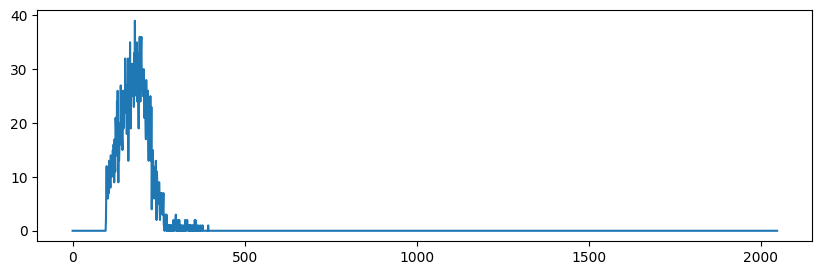

Conteos micro =  3290
Conteos DPP =  3124


In [110]:
# Configuración de la conexión serial
ser = serial.Serial('COM6', 460800, timeout=1)  # Cambia '/dev/ttyUSB0' por tu puerto serial
# Si estás en Windows, el puerto podría ser algo como 'COM3'

# Envía un carácter para solicitar los datos
ser.write(b'H')  # Enviar un carácter cualquiera, aquí 'R'

# Lee 1024 valores del ADC
dpp_values = []
for _ in range(2048):
    line = ser.readline().decode('utf-8').strip()
    if line.isdigit():
        dpp_values.append(int(line))

# Envía un carácter para solicitar los datos
ser.write(b'J')  # Enviar un carácter cualquiera, aquí 'R'

# Lee 1024 valores del ADC
counter = int(ser.readline().decode('utf-8').strip())

# Cierra la conexión serial
ser.close()

plt.figure(figsize=(10,3))
# plt.bar(range(0, 2048), dpp_values)#, edgecolor='black')
plt.plot(dpp_values)
plt.show()

print("Conteos micro = ", counter)
print("Conteos DPP = ", np.sum(np.array(dpp_values)))

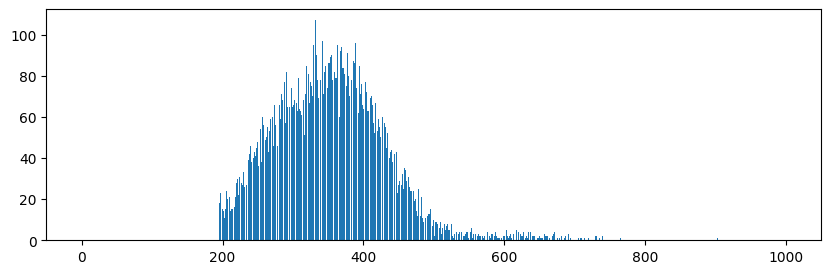

Conteos micro =  17132
Conteos DPP =  16330


In [104]:
plt.figure(figsize=(10,3))
plt.bar(range(0, 1000), dpp_values[0:1000])#, edgecolor='black')
# plt.plot(dpp_values)
plt.show()

print("Conteos micro = ", counter)
print("Conteos DPP = ", np.sum(np.array(dpp_values)))

In [105]:
# Convierte el array de NumPy a un DataFrame de Pandas
df = pd.DataFrame(dpp_values)

# Guarda el DataFrame como un archivo CSV
df.to_csv('dpp_values_com_03.csv', index=False)